In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
#import data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')



In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

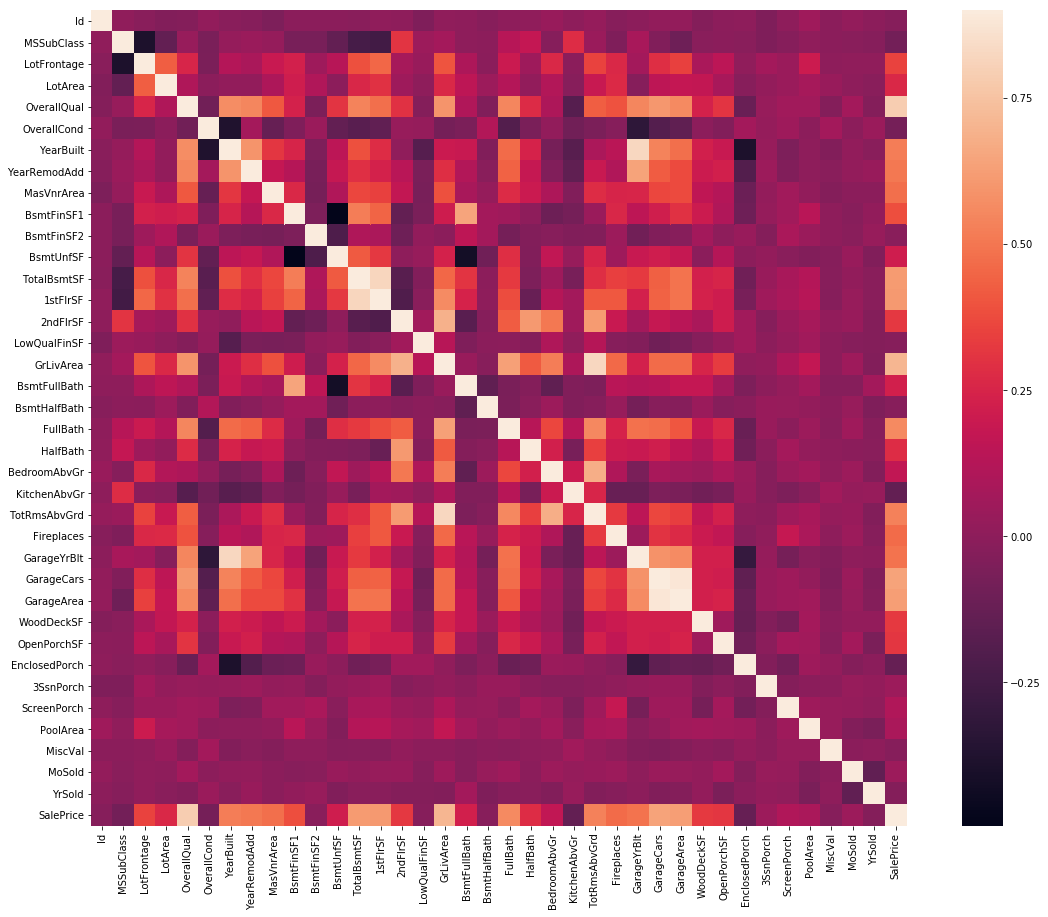

In [6]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [7]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

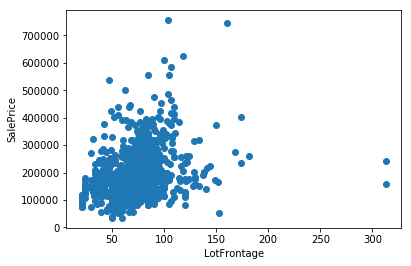

In [8]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['LotFrontage'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
plt.show()

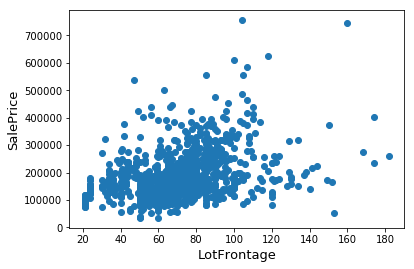

In [9]:
#delete outliers

train = train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['LotFrontage'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

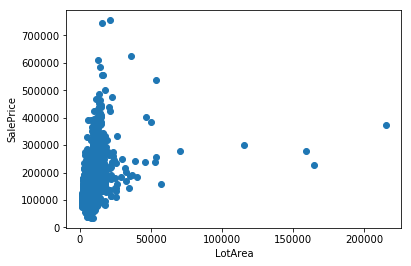

In [10]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['LotArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.show()

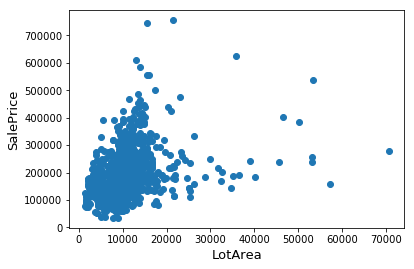

In [11]:
train = train.drop(train[(train['LotArea']>100000) & (train['SalePrice']<500000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['LotArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

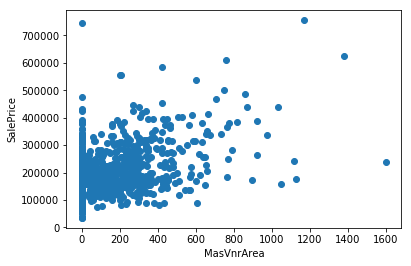

In [12]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['MasVnrArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('MasVnrArea')
plt.show()

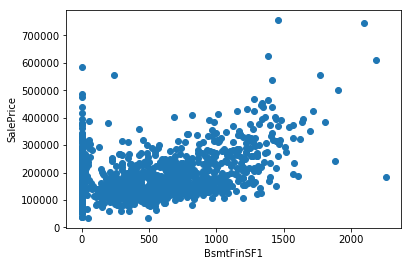

In [13]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['BsmtFinSF1'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('BsmtFinSF1')
plt.show()

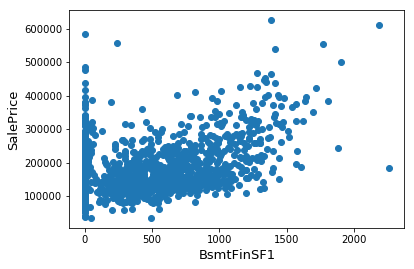

In [14]:
train = train.drop(train[(train['BsmtFinSF1']>1400) & (train['SalePrice']>700000)].index)


#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['BsmtFinSF1'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtFinSF1', fontsize=13)
plt.show()

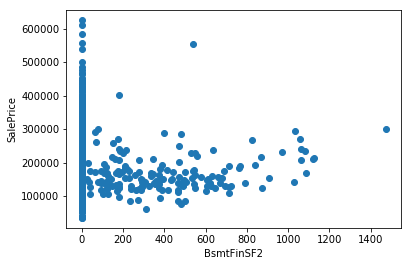

In [15]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['BsmtFinSF2'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('BsmtFinSF2')
plt.show()

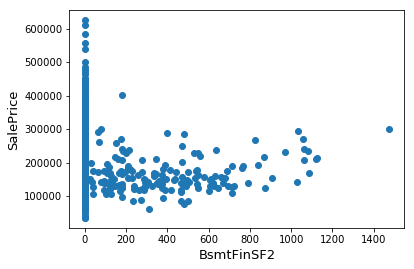

In [16]:
train = train.drop(train[(train['BsmtFinSF2']>400) & (train['SalePrice']>400000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['BsmtFinSF2'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtFinSF2', fontsize=13)
plt.show()

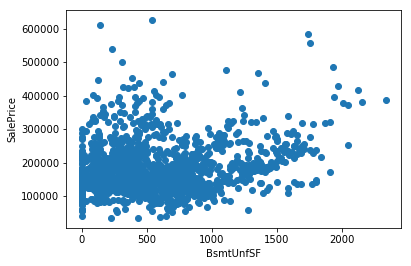

In [17]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['BsmtUnfSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('BsmtUnfSF')
plt.show()

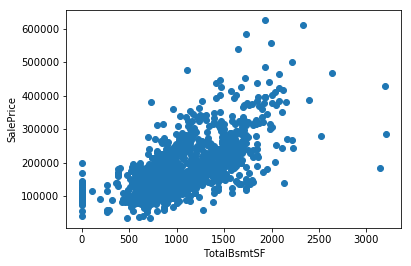

In [18]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

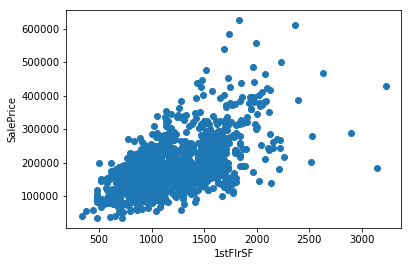

In [19]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['1stFlrSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()

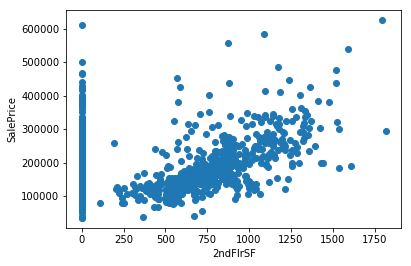

In [20]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['2ndFlrSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('2ndFlrSF')
plt.show()

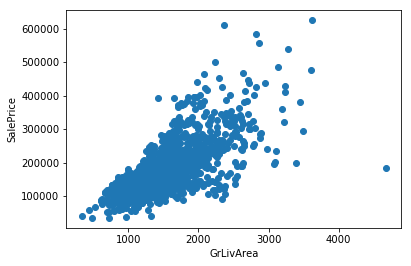

In [21]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

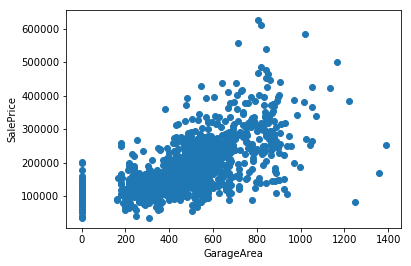

In [22]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

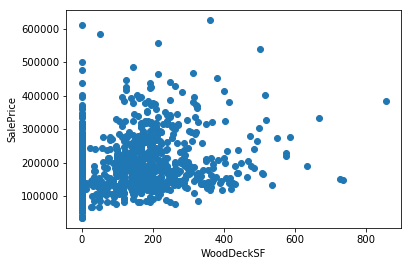

In [23]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['WoodDeckSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('WoodDeckSF')
plt.show()

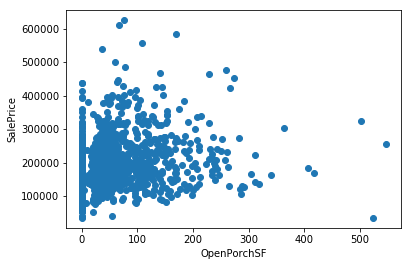

In [24]:
#Let us see if there are any outliers

fig, ax = plt.subplots()
ax.scatter(x = train['OpenPorchSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OpenPorchSF')
plt.show()

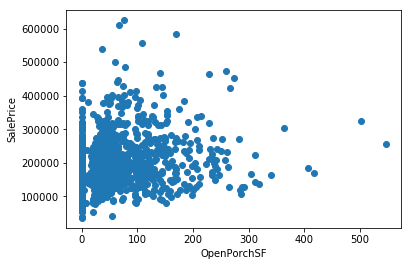

In [25]:
train = train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['OpenPorchSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OpenPorchSF')
plt.show()

In [26]:
#we removed 14 outliers in total

train.shape

(1450, 81)

/anaconda3/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


179634.54896551723 75787.67767585069


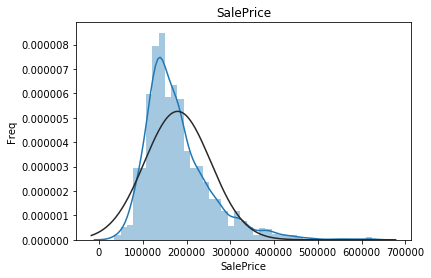

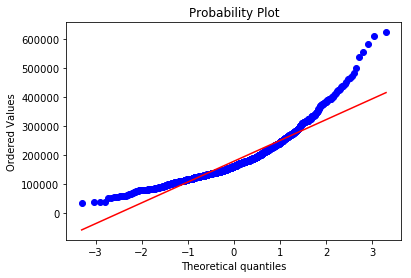

In [27]:
#let us plot sale price
sns.distplot(train['SalePrice'] , fit=stats.norm);

expect, std = stats.norm.fit(train['SalePrice'])
print expect, std

plt.ylabel('Freq')
plt.title('SalePrice')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [28]:
#take the log of our train data

train["SalePrice"] = np.log(train["SalePrice"])

12.020459462199495 0.39204003893461037


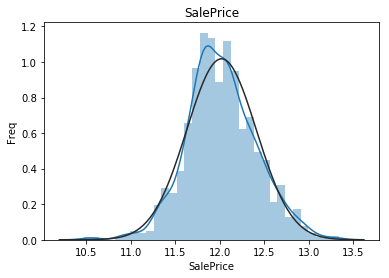

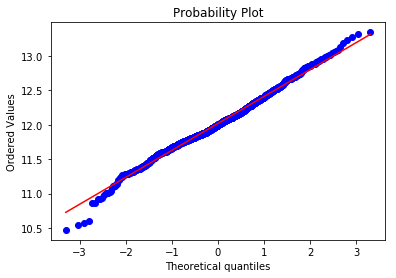

In [29]:
#let us check the plot again
sns.distplot(train['SalePrice'] , fit=stats.norm);

expect, std = stats.norm.fit(train['SalePrice'])
print expect, std

plt.ylabel('Freq')
plt.title('SalePrice')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [30]:
#check missing values
[col for col in train.columns if train[col].isnull().any()]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [31]:
[col for col in test.columns if test[col].isnull().any()]

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [32]:
#separate X and Y train
Y_train=train['SalePrice']
X_train=train.drop(['SalePrice'],axis=1)

#combine the data

combined=[X_train,test]

In [33]:
# 'MSZoning' - most common value RL 
print X_train['MSZoning'].value_counts()
print test['MSZoning'].value_counts()

X_train['MSZoning'] = X_train['MSZoning'].fillna(X_train['MSZoning'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

RL         1142
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [34]:
#'LotFrontage' nan - replace nan with median of 'LotFrontage' in certain "Neighborhood"

X_train['LotFrontage'] = X_train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))


In [35]:
#'Alley' nan=no alley 
for dataset in combined:
    dataset['Alley'] = dataset['Alley'].fillna('None')

In [36]:
#'Utilities'-replace with most common
print X_train['Utilities'].value_counts()
print test['Utilities'].value_counts()

for dataset in combined:
    dataset['Utilities'] = dataset['Utilities'].fillna(dataset['Utilities'].mode()[0])

AllPub    1449
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1457
Name: Utilities, dtype: int64


In [37]:
# 'Exterior1st' and 'Exterior2nd'-replace with most common
print X_train['Exterior1st'].value_counts()
print test['Exterior1st'].value_counts()

print X_train['Exterior2nd'].value_counts()
print test['Exterior2nd'].value_counts()

for dataset in combined:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

VinylSd    514
HdBoard    221
MetalSd    220
Wd Sdng    202
Plywood    106
CemntBd     61
BrkFace     49
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    503
MetalSd    214
HdBoard    205
Wd Sdng    195
Plywood    140
CmentBd     60
Wd Shng     38
Stucco      25
BrkFace     24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, 

In [38]:
#'MasVnrType'-fill with none
for dataset in combined:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')

In [39]:
#'MasVnrArea'-fill with 0
for dataset in combined:
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [40]:

#'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'- 0=no basement
for datset in combined:
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0)
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)

In [41]:
#'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2'- NA=no basement

X_train['BsmtQual'] = X_train['BsmtQual'].fillna('None')
X_train['BsmtCond'] = X_train['BsmtCond'].fillna('None')
X_train['BsmtExposure'] = X_train['BsmtExposure'].fillna('None')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].fillna('None')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].fillna('None')
    
    
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
    

In [42]:
#'KitchenQual' - fill with most common
print X_train['KitchenQual'].value_counts()
print test['KitchenQual'].value_counts()

for dataset in combined:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

TA    732
Gd    583
Ex     96
Fa     39
Name: KitchenQual, dtype: int64
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


In [43]:
#'Functional'-fill with most common
print X_train['Functional'].value_counts()
print test['Functional'].value_counts()

for dataset in combined:
    dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].mode()[0])

Typ     1350
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


In [44]:
#'Electrical'-fill with most common
print X_train['Electrical'].value_counts()
print test['Electrical'].value_counts()

for dataset in combined:
    dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

SBrkr    1325
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


In [45]:
#FireplaceQu'- NA=no fireplace
for dataset in combined:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')

In [46]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'- NA=no garage

X_train['GarageType'] = X_train['GarageType'].fillna('None')
X_train['GarageFinish'] = X_train['GarageFinish'].fillna('None')
X_train['GarageQual'] = X_train['GarageQual'].fillna('None')
X_train['GarageCond'] = X_train['GarageCond'].fillna('None')

test['GarageType'] = test['GarageType'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')

In [47]:
# 'GarageYrBlt','GarageCars','GarageArea' 0=no garage
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(0)
X_train['GarageCars'] = X_train['GarageCars'].fillna(0)
X_train['GarageArea'] = X_train['GarageArea'].fillna(0)

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)

In [48]:
#'PoolQC' - NA=no pool
for dataset in combined:
    dataset['PoolQC'] = dataset['PoolQC'].fillna('None')

In [49]:
#'Fence' - NA=no fence
for dataset in combined:
    dataset['Fence'] = dataset['Fence'].fillna('None')

In [50]:
#'MiscFeature' - NA=no MiscFeature
for dataset in combined:
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')

In [51]:
# 'SaleType'
print X_train['SaleType'].value_counts()
print test['SaleType'].value_counts()

for dataset in combined:
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

WD       1258
New       121
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64


In [52]:
#check again for NA values
[col for col in X_train.columns if X_train[col].isnull().any()]

[]

In [53]:
[col for col in test.columns if test[col].isnull().any()]

[]

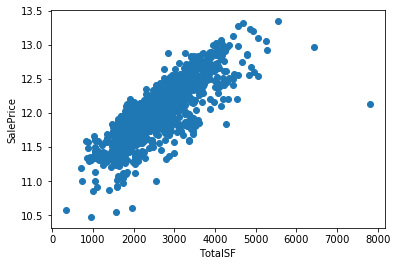

In [54]:
#let us add an additionla feature - total area
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
#and lets plot

fig, ax = plt.subplots()
ax.scatter(x = X_train['TotalSF'], y = Y_train)
plt.ylabel('SalePrice')
plt.xlabel('TotalSF')
plt.show()

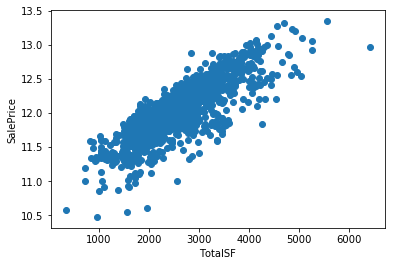

In [55]:
#let us remove this outlier
train=X_train.join(Y_train)
train = train.drop(train[(train['TotalSF']>7500) & (train['SalePrice']<12.5)].index)

Y_train=train['SalePrice']
X_train=train.drop(['SalePrice'],axis=1)

fig, ax = plt.subplots()
ax.scatter(x = X_train['TotalSF'], y = Y_train)
plt.ylabel('SalePrice')
plt.xlabel('TotalSF')
plt.show()

In [56]:
X_train['Total_Bathrooms'] = (X_train['FullBath'] + (0.5*X_train['HalfBath']) + 
                               X_train['BsmtFullBath'] + (0.5*X_train['BsmtHalfBath']))

X_train['Total_porch_SF'] = (X_train['OpenPorchSF'] + X_train['3SsnPorch'] +
                              X_train['EnclosedPorch'] + X_train['ScreenPorch'] +
                             X_train['WoodDeckSF'])

test['Total_Bathrooms'] = (test['FullBath'] + (0.5*test['HalfBath']) + 
                              test['BsmtFullBath'] + (0.5*test['BsmtHalfBath']))

test['Total_porch_SF'] = (test['OpenPorchSF'] + test['3SsnPorch'] +
                              test['EnclosedPorch'] + test['ScreenPorch'] +
                             test['WoodDeckSF'])


In [57]:
#transforming numerical data to categorical
#MSSubClass=The building class
X_train['MSSubClass'] = X_train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

#OverallCond
X_train['OverallCond'] = X_train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#OverallQual
X_train['OverallQual'] = X_train['OverallQual'].astype(str)
test['OverallQual'] = test['OverallQual'].astype(str)

#YearBuilt
X_train['YearBuilt'] = X_train['YearBuilt'].astype(str)
test['YearBuilt'] = test['YearBuilt'].astype(str)

#YearRemodAdd
X_train['YearRemodAdd'] = X_train['YearRemodAdd'].astype(str)
test['YearRemodAdd'] = test['YearRemodAdd'].astype(str)

#GarageYrBlt
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].astype(str)
test['GarageYrBlt'] = test['GarageYrBlt'].astype(str)

#'YrSold' and 'MoSold'
X_train['YrSold'] = X_train['YrSold'].astype(str)
X_train['MoSold'] = X_train['MoSold'].astype(str)

test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [58]:
features = ('Electrical','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofMatl','RoofStyle','HouseStyle','Neighborhood','SaleCondition','SaleType','MiscFeature','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','BldgType','OverallCond','OverallQual','YearBuilt','YearRemodAdd','ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional', 'FireplaceQu', 'GarageQual', 'GarageCond','PoolQC', 'GarageType','GarageFinish','PavedDrive', 'Fence', 'YrSold', 'MoSold','Condition1','Condition2')


#LabelEncoder
for i in features:
    LE = LabelEncoder() 
    LE.fit(list(X_train[i].values)) 
    X_train[i] = LE.transform(list(X_train[i].values))
    LE.fit(list(test[i].values)) 
    test[i] = LE.transform(list(test[i].values))


In [59]:
#let us drop 'id'

X_train=X_train.drop('Id', axis=1)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_Bathrooms,Total_porch_SF
0,9,3,65.0,8450,1,1,3,3,0,4,...,4,1,0,4,2,8,4,2566,3.5,61
1,4,3,80.0,9600,1,1,3,3,0,2,...,4,1,0,7,1,8,4,2524,2.5,298
2,9,3,68.0,11250,1,1,0,3,0,4,...,4,1,0,11,2,8,4,2706,3.5,42
3,10,3,60.0,9550,1,1,0,3,0,0,...,4,1,0,4,0,8,0,2473,2.0,307
4,9,3,84.0,14260,1,1,0,3,0,2,...,4,1,0,3,2,8,4,3343,3.5,276


In [60]:
test_id=test['Id']

In [61]:
#let us drop 'id'

test=test.drop('Id', axis=1)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_Bathrooms,Total_porch_SF
0,5,2,80.0,11622,1,1,3,3,0,4,...,2,1,0,8,4,8,4,1778.0,1.0,260
1,5,3,81.0,14267,1,1,0,3,0,0,...,4,0,12500,8,4,8,4,2658.0,1.5,429
2,10,3,74.0,13830,1,1,0,3,0,4,...,2,1,0,5,4,8,4,2557.0,2.5,246
3,10,3,78.0,9978,1,1,0,3,0,4,...,4,1,0,8,4,8,4,2530.0,2.5,396
4,0,3,43.0,5005,1,1,0,1,0,4,...,4,1,0,0,4,8,4,2560.0,2.0,226


In [62]:
from sklearn.linear_model import Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

In [63]:
reg1 = Lasso(alpha=0.0005,max_iter=5000, tol=0.0001,random_state=1)
reg1 = reg1.fit(X_train, Y_train)
print reg1.score(X_train, Y_train)
Y_pred1 = reg1.predict(test)

0.9134265892971027


In [64]:
reg2 = RidgeCV(alphas=[0.0001, 0.0003, 0.001, 0.005,0.01,0.1,1.0,10], cv=8)
reg2 = reg2.fit(X_train, Y_train)
print reg2.score(X_train, Y_train)
print 
Y_pred2 = reg2.predict(test)

0.9148899675491788



In [65]:
reg3 = ElasticNet(alpha=0.005,l1_ratio=0.9,random_state=4)
reg3 = reg3.fit(X_train, Y_train)
print reg3.score(X_train, Y_train)
Y_pred3 = reg3.predict(test)

0.9035259553143827


In [66]:
reg4 = GradientBoostingRegressor(learning_rate=0.05, max_features='sqrt',min_samples_leaf=20,max_depth=3, min_samples_split=10, n_estimators=12000,loss='huber')
reg4 = reg4.fit(X_train, Y_train)
print reg4.score(X_train, Y_train)
Y_pred4 = reg4.predict(test)

0.9904692838274597


In [67]:
reg5 = RandomForestRegressor(n_estimators=100,  max_depth=30,  max_features='sqrt')
reg5 = reg5.fit(X_train, Y_train)
print reg5.score(X_train, Y_train)
Y_pred5 = reg5.predict(test)

0.9841265073118753


In [ ]:
reg6 = SVR(kernel='poly', C = 1000, gamma = 0.0001)
reg6 = reg6.fit(X_train, Y_train)
print reg6.score(X_train, Y_train)
Y_pred6 = reg6.predict(test)

In [ ]:
submit = pd.DataFrame({
        'Id': test_id,
        'SalePrice': np.exp((Y_pred4+Y_pred5)/2.0)
    })
submit.to_csv('./submission.csv', index=False)

In [ ]:
#best submission with only GradientBoostingRegressor and RandomForestRegressor